<div style="padding-top:10px;height:70px;background:#0d1a32;color:white;border-radius:15px;"><center><h1>One Step Forecast of the Ether Cryptocurrency </h1></center></div>


<h3>This notebook covers sections from:</h3>
<ul>
  <li><b>1.2</b> Data Sources to <b>3.1.2</b> Single Layer Perceptron for $E$ </li> 
</ul>
<hr>
<p>The full report can be found <a href="http://lrgcobranzas.com/data_analytics/final_report_advanced_project.pdf">here</a></p>
<p><em>By Gari Ciodaro Guerra.</em></p>

In [4]:
ruta="data/"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime

font = {'family': 'serif',
        'weight': 'bold',
        'size': 16,
        }

In [6]:


# Reading ether scan data.

#Ether price
ether_price=pd.read_csv(ruta+'ether_scan/export-EtherPrice.csv',delimiter=",")
ether_price['date'] = pd.to_datetime(ether_price['UnixTimeStamp'],unit='s')
ether_price.set_index('date', inplace=True)

#Transactions 
TxGrowth=pd.read_csv(ruta+'ether_scan/export-TxGrowth.csv',delimiter=",")
TxGrowth['date'] = pd.to_datetime(TxGrowth['UnixTimeStamp'],unit='s')
TxGrowth.set_index('date', inplace=True)



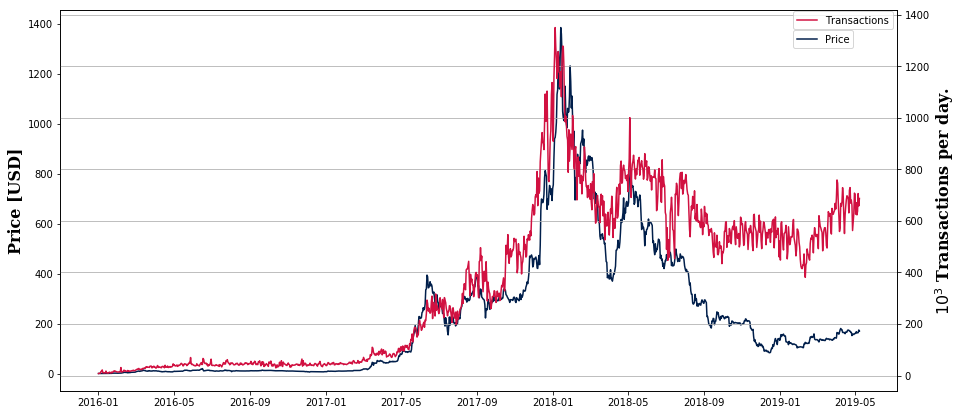

In [9]:


# Plotting ether Price and Transanctions from ether scan

#General canvas
fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(15,7))

#Plot one
ax1 . plot (ether_price['Value']['2016':'2019'], label="Price",color='#011f4b')
ax1 . set_ylabel ('Price [USD]',fontdict=font)
ax1 . tick_params ( axis ='y')

#Plot two
ax2 = ax1 . twinx ()
ax2.plot(TxGrowth['Value']['2016':'2019']/1000, label="Transactions", color ='#d11141' )
ax2 . set_ylabel ('$10^3$ Transactions per day.'  ,fontdict=font)

#legend locations
ax1.legend(loc=[0.875,0.9])
ax2.legend(loc=[0.875,0.95])
plt.grid(True) 

#Local save
plt.savefig(fname=ruta+"/ether_scan_price_trans.pdf")
plt.show() 



In [10]:
# Reading Deepblue bot data (sentiment extraccion)
dataset=pd.read_csv(ruta+'deepblue_bot/dump_history.txt',delimiter=";")
dataset['date'] = pd.to_datetime(dataset['time_stamp(17)'],unit='s')
dataset.set_index('date', inplace=True)

# Getting daily averages
dataset_d_freq=dataset
dataset_d_freq = dataset_d_freq.resample('D').mean()

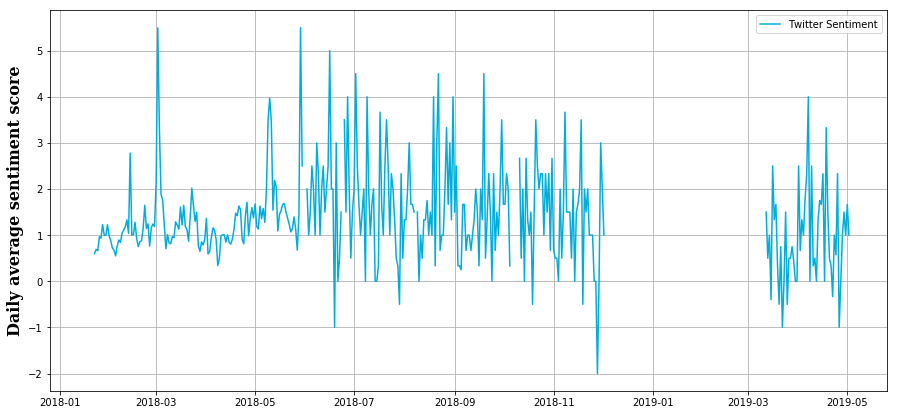

In [13]:


# Plotting Twitter Sentiment
plt . figure(figsize=(15,7))
plt.plot(dataset_d_freq['sentiment_Twitter(15)'],label="Twitter Sentiment",color='#00aedb')
plt . legend ( loc='best')
plt . ylabel ('Daily average sentiment score'  ,fontdict=font)
plt.grid(True)
plt.savefig(fname=ruta+"/twitter.pdf")



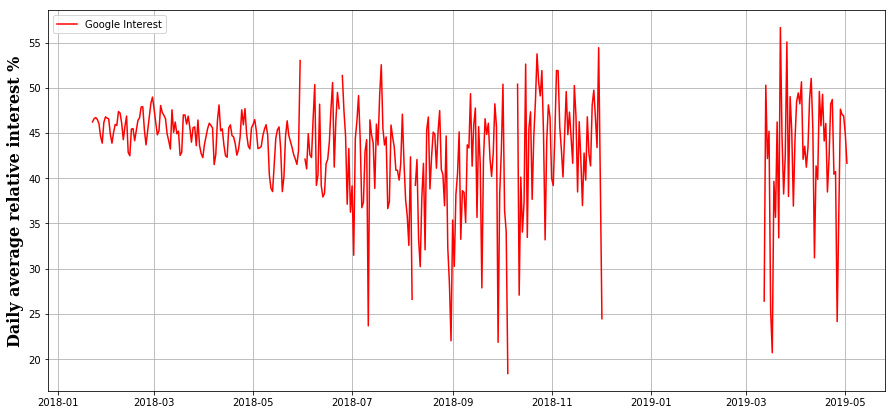

In [15]:


# Plotting Google trend Sentiment
plt . figure(figsize=(15,7))
plt.plot(dataset_d_freq['interest_trends(16)'],label="Google Interest",color='red')
plt . legend ( loc='best')
plt . ylabel ('Daily average relative interest %' ,fontdict=font )
plt.grid(True)
plt.savefig(fname=ruta+"/google.pdf")



# Accompaning notes over Advanced project 1.

# Sections: Time series analysis



In [16]:


from sklearn.preprocessing import MinMaxScaler

ether_price_anali=np.log(ether_price[['Value']]['2015-10':'2019'])

#let us scale the data
scaler = MinMaxScaler()
scaler.fit(ether_price_anali)

#Min-max data
scaled_data= scaler.transform(ether_price_anali)


ether_price_anali=pd.DataFrame(scaled_data,
                               columns=['P_r'],index=ether_price_anali.index)
#ether_price_anali
#ether_price_anali



In [17]:


def odd_moving_averages(series,n):
    """
       Description: Function for calculating odd moving averages
       input: -Series (Array): time series of equally espaced data
              -n(integer): number of moving averages
       ouput: new smothed series    
    """
    new_series={}
    counter=int(n/2)
    positions=list(np.arange(-counter,counter,1))
    left=int(n/2)

    while(counter<len(series)-1):
        calculation=[]
        #Start reducing the number points for moving average
        #based on availability
        if(counter>len(series)-left):
            if positions == []:
                break
            positions.pop(0)
            positions.pop(-1)   
        for every_position in positions:
            calculation.append(series[counter+every_position])
            moving_4MV=(sum(calculation))/len(positions)
        counter+=1
        new_series[series.index[counter]]=moving_4MV
    return new_series



In [21]:


anali_87MV=pd.DataFrame.from_dict(odd_moving_averages(ether_price_anali['P_r'],87),orient='index')
anali_297MV=pd.DataFrame.from_dict(odd_moving_averages(ether_price_anali['P_r'],297),orient='index')
anali_150MV=pd.DataFrame.from_dict(odd_moving_averages(ether_price_anali['P_r'],150),orient='index')



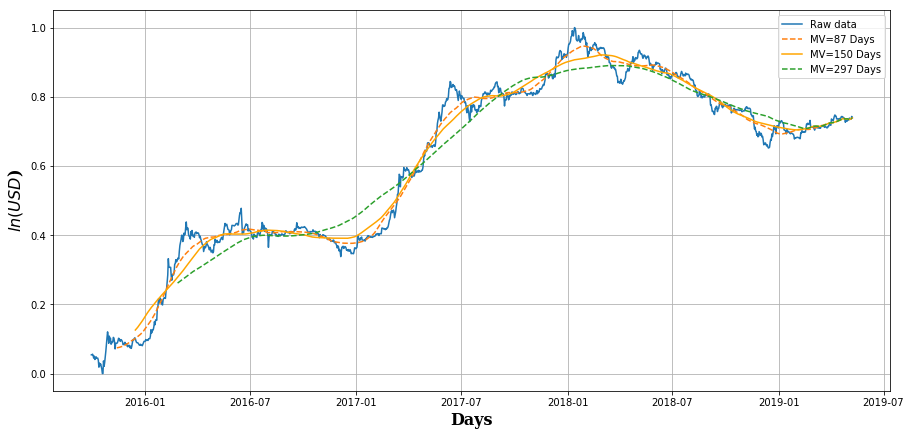

In [24]:


plt . figure(figsize=(15,7))

plt.plot(ether_price_anali['P_r'], label="Raw data")
plt.plot(anali_87MV, '--', label="MV=87 Days" )
plt.plot(anali_150MV, '-' ,label="MV=150 Days",color='orange')
plt.plot(anali_297MV, '--',label="MV=297 Days")

plt . legend ( loc='best' )
plt . xlabel ('Days' ,fontdict=font)
plt . ylabel ('$ln(USD$)' ,fontdict=font)
plt.grid(True)
#plt.savefig(fname="/home/gari/Desktop/Jacobs_resourses/Advanced_project/latex/img/trend.pdf")
plt.savefig(fname=ruta+"/moving_averages.pdf")



In [25]:
composition=ether_price_anali.join(anali_150MV)
composition['de-Trended']=composition["P_r"] - composition[0]
composition=composition.rename(columns={0: "Trend"})
composition=composition.dropna()
composition=composition['2016':'2019']
composition

,P_r,Trend,de-Trended
date,,,
2016-01-01,0.092919,0.162480,-0.069561
2016-01-02,0.092919,0.165103,-0.072184
2016-01-03,0.098147,0.167762,-0.069615
2016-01-04,0.095560,0.170348,-0.074788
2016-01-05,0.095560,0.172993,-0.077433
2016-01-06,0.096861,0.175623,-0.078762
2016-01-07,0.095560,0.177971,-0.082410
2016-01-08,0.100681,0.180566,-0.079885
2016-01-09,0.100681,0.183013,-0.082332


In [26]:
#anali_150MV
ms=np.arange(1,13,1)
seasonal_index={}
for every_month in ms:
    every_month=str(every_month)
    avg=(composition['de-Trended'].loc[composition['de-Trended'].index.isin(['2016-'+every_month, '2017-'+every_month,
                                                   '2018-'+every_month, '2019-'+every_month])]).mean()
    
    seasonal_index[int(every_month)]=avg
    

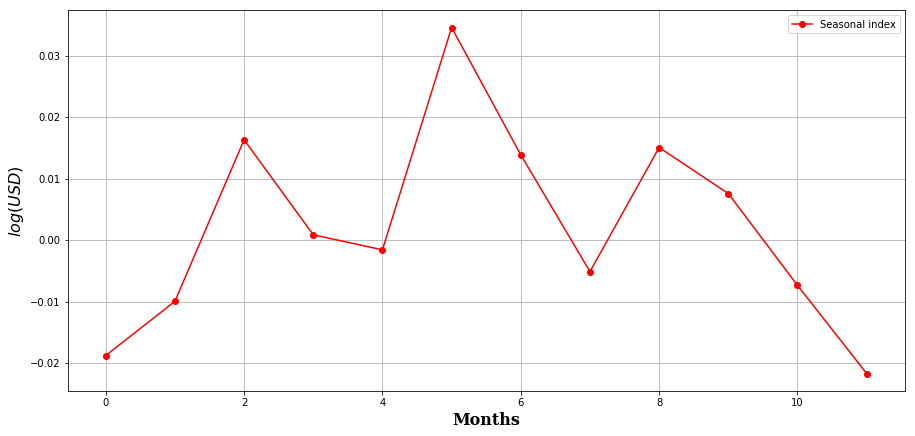

In [28]:


plt . figure(figsize=(15,7))
plt.plot(seasonal_index.values(), '-or', label="Seasonal index")

plt . legend ( loc='best')
plt . xlabel ('Months',fontdict=font)
plt . ylabel ( '$log(USD)$' ,fontdict=font)
plt.grid(True)
#plt.savefig(fname="/home/gari/Desktop/Jacobs_resourses/Advanced_project/latex/img/seasonal_index.pdf")
plt.savefig(fname=ruta+"/seasonal_index.pdf")



In [29]:
seasonal_index_df=pd.DataFrame.from_dict(seasonal_index, orient='index')
seasonal_index_df_full_years=seasonal_index_df.append(seasonal_index_df).append(seasonal_index_df).append(seasonal_index_df)
seasonal_index_df_full_years=seasonal_index_df_full_years.reset_index()
#seasonal_index_df_full_years.drop(['index'])
seasonal_index_df_full_years=seasonal_index_df_full_years[[0]]
#seasonal_index_df_full_years

from scipy.interpolate import interp1d

x=np.array(seasonal_index_df_full_years.index)
y=np.array(seasonal_index_df_full_years.values).flatten()

seasonal_index_full_interpolation = interp1d(x,y, kind='quadratic')

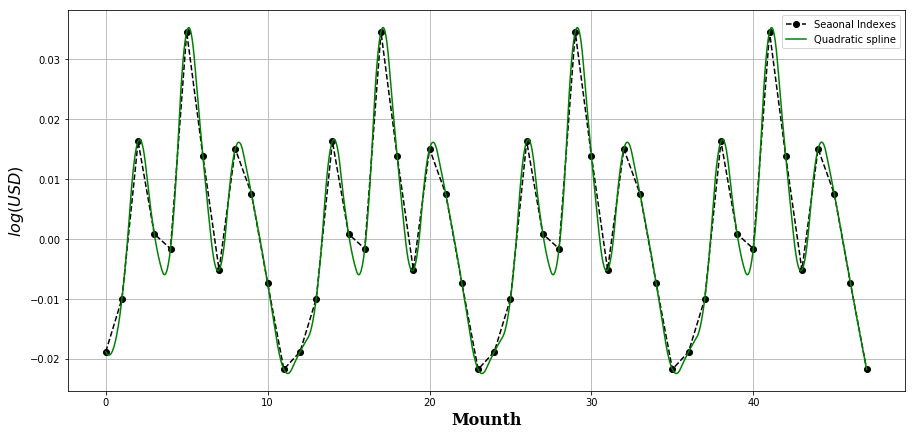

In [40]:


x_new=np.linspace(x[0], x[len(x)-1],num=1400)

plt . figure(figsize=(15,7))
plt.plot(seasonal_index_df_full_years.values, '--o', label="Seaonal Indexes",color='black')
plt.plot(x_new,seasonal_index_full_interpolation(x_new), label="Quadratic spline",color='green')

plt . legend ( loc='best')
plt . xlabel ('Mounth' ,fontdict=font)
plt . ylabel ( '$log(USD)$',fontdict=font)
plt.grid(True)
#plt.savefig(fname="/home/gari/Desktop/Jacobs_resourses/Advanced_project/latex/img/seasonal.pdf")
plt.savefig(fname=ruta+"/seasonal_interpolation.pdf")



In [33]:


from calendar import monthrange
ms=np.arange(1,13,1)
ms_2=np.arange(1,13*4,1)
ind=[]
current_day=0
j=0
k=0
every_year= [2016,2017,2018,2019]

for every_month in ms_2:
    if(j>11):
        j=0
        k+=1
    if(k>3):
        k=0
    days=monthrange(every_year[k], ms[j])[1]
    rango=list(np.linspace(current_day, every_month,num=days))
    current_day=every_month
    rango.pop(-1)

    j+=1
    ind.append(np.array(rango))

final_index_flaten=[item for sublist in ind for item in sublist] 



In [34]:


sesonal_final=seasonal_index_full_interpolation(final_index_flaten[:len(composition)])



In [35]:


composition['Seasonal']=sesonal_final
#composition['Error']=composition['P_r']-composition['Trend']-composition['Seasonal']



In [36]:
composition

,P_r,Trend,de-Trended,Seasonal
date,,,,
2016-01-01,0.092919,0.162480,-0.069561,-0.018786
2016-01-02,0.092919,0.165103,-0.072184,-0.018959
2016-01-03,0.098147,0.167762,-0.069615,-0.019100
2016-01-04,0.095560,0.170348,-0.074788,-0.019209
2016-01-05,0.095560,0.172993,-0.077433,-0.019285
2016-01-06,0.096861,0.175623,-0.078762,-0.019330
2016-01-07,0.095560,0.177971,-0.082410,-0.019342
2016-01-08,0.100681,0.180566,-0.079885,-0.019322
2016-01-09,0.100681,0.183013,-0.082332,-0.019270


In [37]:
#We now apply a Statistical t-test for the seaonal component
from scipy import stats
R_p_r =composition['Trend']+composition['Seasonal']
SR_p_r=composition['Trend']
stats.ttest_ind(R_p_r,SR_p_r,equal_var=False)


Ttest_indResult(statistic=0.27397566886150015, pvalue=0.7841264548191691)

In [38]:


composition =composition.drop('Seasonal' ,axis=1)
composition=composition.rename(columns={'de-Trended': "Error"})
composition



,P_r,Trend,Error
date,,,
2016-01-01,0.092919,0.162480,-0.069561
2016-01-02,0.092919,0.165103,-0.072184
2016-01-03,0.098147,0.167762,-0.069615
2016-01-04,0.095560,0.170348,-0.074788
2016-01-05,0.095560,0.172993,-0.077433
2016-01-06,0.096861,0.175623,-0.078762
2016-01-07,0.095560,0.177971,-0.082410
2016-01-08,0.100681,0.180566,-0.079885
2016-01-09,0.100681,0.183013,-0.082332


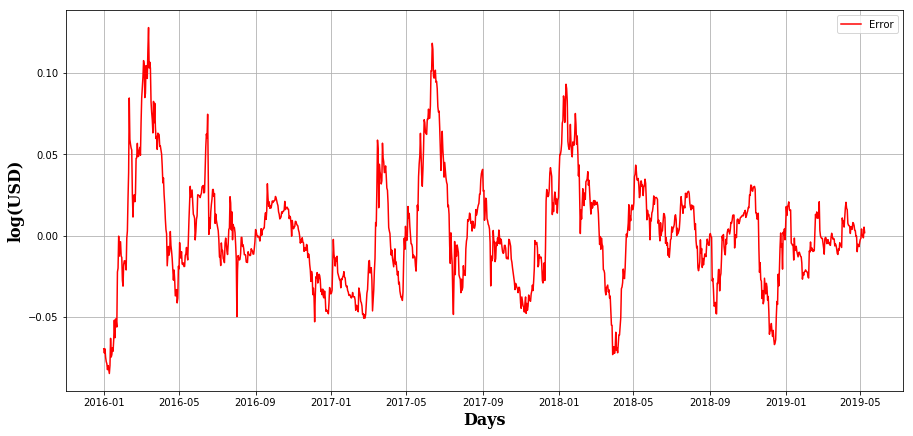

In [42]:
plt . figure(figsize=(15,7))


plt.plot(composition[['Error']], '-' ,label="Error", color="red")


plt . legend ( loc='best')
plt . xlabel ('Days',fontdict=font)
plt . ylabel ('log(USD)',fontdict=font)
plt.grid(True)
#plt.savefig(fname="/home/gari/Desktop/Jacobs_resourses/Advanced_project/latex/img/Residual_error_u.pdf")
plt.savefig(fname=ruta+"/Residual_error_u.pdf")

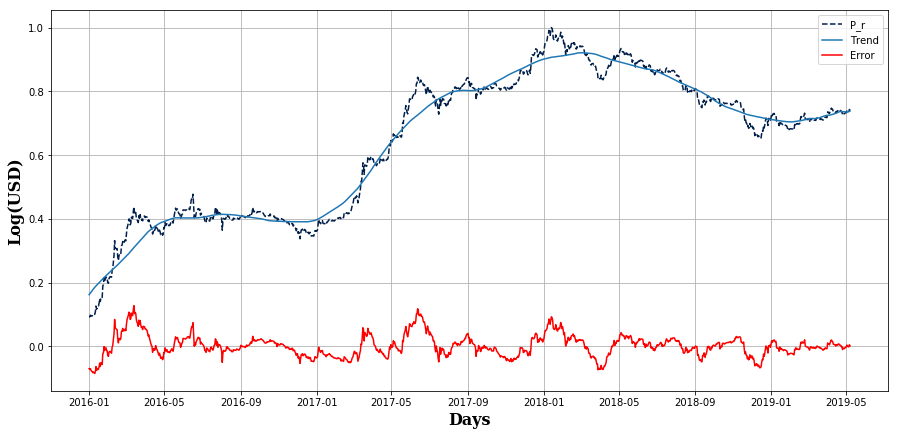

In [43]:


plt . figure(figsize=(15,7))

plt.plot(composition[['P_r']], '--' ,label="P_r",color='#011f4b')
plt.plot(composition[['Trend']], '-' ,label="Trend")
plt.plot(composition[['Error']], '-' ,label="Error",color='red')


plt . legend ( loc='best')
plt . xlabel ('Days' ,fontdict=font)
plt . ylabel ('Log(USD)' ,fontdict=font)
plt.grid(True)
#plt.savefig(fname="/home/gari/Desktop/Jacobs_resourses/Advanced_project/latex/img/single_plot.pdf")
plt.savefig(fname=ruta+"/single_plot.pdf")



# Time Series Modeling

In [44]:
df_trend=composition[['Trend']]
df_Error=composition[['Error']]

In [45]:
composition.describe()

,P_r,Trend,Error
count,1224.000000,1224.000000,1224.000000
mean,0.643799,0.641863,0.001936
std,0.220037,0.215573,0.033460
min,0.092919,0.162480,-0.084766
25%,0.409560,0.406289,-0.018553
50%,0.714782,0.716600,-0.001046
75%,0.817184,0.823702,0.018868
max,1.000000,0.920958,0.127946


In [46]:


def sMAPE(y,h):
    '''Symetrical mean absolute percentage error.'''
    h=h.reshape(len(h),1)
    y=y.reshape(len(y),1)
    num=np.abs(y-h)
    dem=(np.abs(y)+np.abs(h))/2
    ajust_dem=np.where(dem==0, 1, dem)
    sMAPE=num/ajust_dem
    return (np.sum(sMAPE)/len(y))*100



In [47]:
def lager(df,max_lag):
    '''Lager function. Only accepts single columns dataframe.
    returns a dataframe with consecutives lags from 1 to max_lag'''
    lags=np.arange(1,max_lag+1,1)
    df_copia=df.copy()
    col_to_lag=list(df.columns)
    if len(col_to_lag) > 1:
        return 'Error: I was designed to handle single column data frame'
    else:
        for lag in lags:
            df_copia['lag_'+str(lag)]=df[col_to_lag[0]].shift(lag)
        return df_copia

def cv_time_series_splitter(df,max_fold):
    '''This function splits the input data frame
    into a list of test train tuples for 
    evaluating of the cv-error. This is know as the -evaluation on a rolling forecasting origin-
    more info in https://robjhyndman.com/hyndsight/tscv/'''
    folds=np.arange(1,max_fold+1,1)
    section=[]
    for fold in folds:
        test_point=df.iloc[[-fold]]
        train_sector=df.iloc[:-fold]
        section.append([train_sector,test_point])
    return section

def re_shaper_np(data,columns):
    '''take a dataframe and get a np array with ajusted dimentions.
    From this point, we start working with matrixes for conviniences'''
    data=data.values.reshape(len(data),columns)
    return data
    
def cv_time_series(tuples_train_test,model,tipo=None,nb_epoch=None):
    '''take a tuple with the train set(x should be a matrix [n,m] where m is the 
    number of features and n the number of records y should be a [n,1] matrix) 
    and test set. -tuples_train_test- should be the output of
    the function cv_time_series_splitter. -model- should be an object with the methods
    fit and predict avaible'''
    scores_train=[]
    scores_test =[]
    scores_naive=[]
    for each_tuple in tuples_train_test:
        list_cols= list(each_tuple[0].columns)
        train_X, train_y= each_tuple[0][list_cols[1:]] , each_tuple[0][list_cols[:1]]
        test_X, test_y = each_tuple[1][list_cols[1:]] , each_tuple[1][list_cols[:1]]
        train_X, train_y= re_shaper_np(train_X,len(list_cols)-1), re_shaper_np(train_y,1)
        test_X , test_y = re_shaper_np(test_X,len(list_cols)-1) , re_shaper_np(test_y,1)
        
        if(tipo=='MLP'):
            model.fit(train_X,train_y,batch_size=1100,nb_epoch=nb_epoch, shuffle=False,verbose=0)
        else:
            model.fit(train_X,train_y)
        
        pred_train=model.predict(train_X)
        pred_test =model.predict(test_X)

        scores_train.append(sMAPE(train_y,pred_train))
        scores_test.append(sMAPE(test_y,pred_test))
        
        scores_naive.append(sMAPE(test_y,train_y[-1:]))
    return [np.mean(scores_train),np.mean(scores_test),np.mean(scores_naive)]
   
    
    
def pred_for_comb(tuples_train_test,model):
    
    array_prediction=[]
    for each_tuple in tuples_train_test:
        list_cols= list(each_tuple[0].columns)
        
        train_X, train_y= each_tuple[0][list_cols[1:]] , each_tuple[0][list_cols[:1]]
        test_X, test_y = each_tuple[1][list_cols[1:]] , each_tuple[1][list_cols[:1]]
        
        train_X, train_y= re_shaper_np(train_X,len(list_cols)-1), re_shaper_np(train_y,1)
        test_X , test_y = re_shaper_np(test_X,len(list_cols)-1) , re_shaper_np(test_y,1)

        model.fit(train_X,train_y)
        
        pred_test =model.predict(test_X)
        array_prediction.append(pred_test)
        
    array_prediction.reverse()    
    return array_prediction

variance of test error (%sMAPE) 1.4694628401987269
variance of training error (%sMAPE) 0.05478585272898401


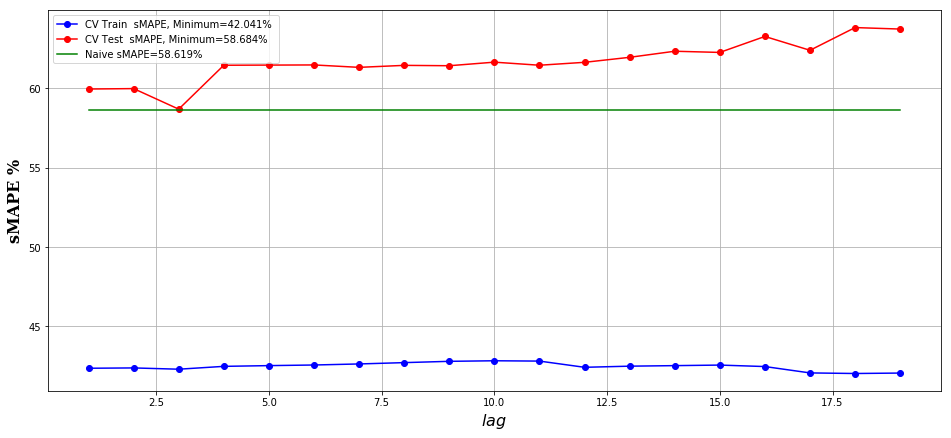

In [48]:
from sklearn.linear_model import Ridge

df=df_Error
rolling=100
lags=np.arange(1,20,1)
label_x=lags
lab='$lag$'

v_train=[]
v_test=[]
v_naive=[]
for lag in lags:
    df_lagged=lager(df=df,max_lag=lag).dropna()
    tuplas=cv_time_series_splitter(df_lagged,rolling)
    model=Ridge(alpha=0.0)
    score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model)
    v_train.append(score_sMAPE[0])
    v_test.append(score_sMAPE[1])
    v_naive.append(score_sMAPE[2])
    
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(16,7))
ax.plot(label_x,v_train, '-o',  label="CV Train  sMAPE, Minimum="+'%.3f'%min(v_train)+"% ",color='blue')
ax.plot(label_x,v_test, '-o',  label="CV Test  sMAPE, Minimum="+'%.3f'%min(v_test)+"% ",color='red')
ax.plot(label_x,v_naive,  label="Naive sMAPE="+'%.3f'%min(v_naive)+"%",color='green')

ax.legend(loc='best')
ax.set_xlabel(lab,fontdict=font )
ax.set_ylabel('sMAPE %',fontdict=font)
ax.grid(True)
plt.savefig(fname=ruta+"/error_sc_1_lag.pdf")
print('variance of test error (%sMAPE)',np.var(v_test))
print('variance of training error (%sMAPE)',np.var(v_train))



variance of test error (%sMAPE) 3.096613947744712e-05
variance of training error (%sMAPE) 0.0010949601071019795


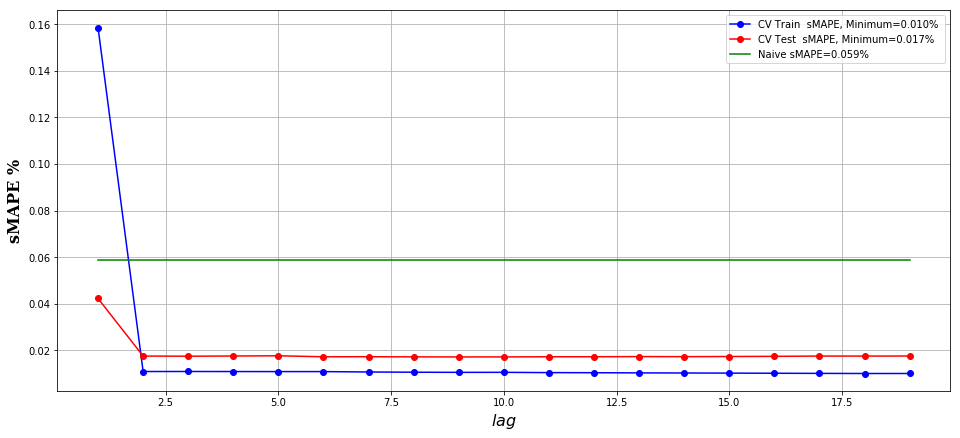

In [49]:
df=df_trend
rolling=100
lags=np.arange(1,20,1)
label_x=lags
lab='$lag$'

v_train=[]
v_test=[]
v_naive=[]
for lag in lags:
    df_lagged=lager(df=df,max_lag=lag).dropna()
    tuplas=cv_time_series_splitter(df_lagged,rolling)
    model=Ridge(alpha=0.0)
    score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model)
    v_train.append(score_sMAPE[0])
    v_test.append(score_sMAPE[1])
    v_naive.append(score_sMAPE[2])
    
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(16,7))
ax.plot(label_x,v_train, '-o',  label="CV Train  sMAPE, Minimum="+'%.3f'%min(v_train)+"% ",color='blue')
ax.plot(label_x,v_test, '-o',  label="CV Test  sMAPE, Minimum="+'%.3f'%min(v_test)+"% ",color='red')
ax.plot(label_x,v_naive,  label="Naive sMAPE="+'%.3f'%min(v_naive)+"%",color='green')

ax.legend(loc='best')
ax.set_xlabel(lab ,fontdict=font)
ax.set_ylabel('sMAPE %',fontdict=font)
ax.grid(True)
plt.savefig(fname=ruta+"/trend_sc_1_lag.pdf")
print('variance of test error (%sMAPE)',np.var(v_test))
print('variance of training error (%sMAPE)',np.var(v_train))

variance of test error (%sMAPE) 71.2323880647291
variance of training error (%sMAPE) 51.92269458641198


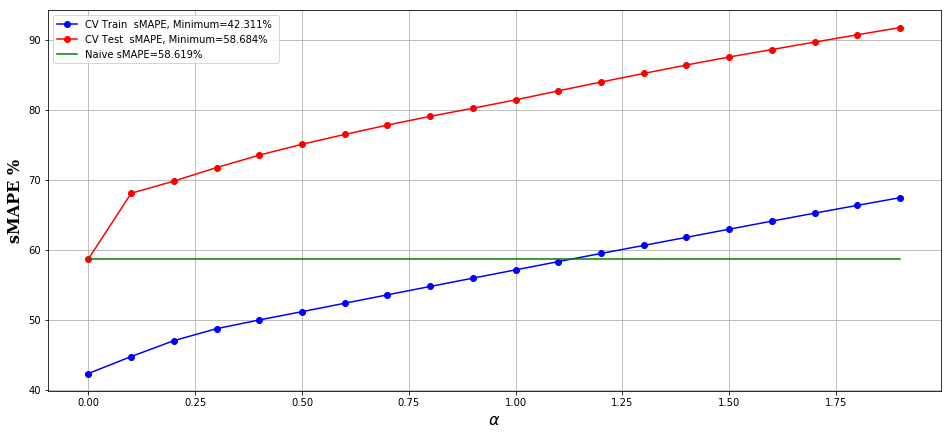

In [50]:


df=df_Error
rolling=100
alphas=np.arange(0,2,0.1)
label_x=alphas
lab=r'$\alpha$'

v_train=[]
v_test=[]
v_naive=[]
for alpha in alphas:
    df_lagged=lager(df=df,max_lag=3).dropna()
    tuplas=cv_time_series_splitter(df_lagged,rolling)
    model=Ridge(alpha=alpha)
    score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model)
    v_train.append(score_sMAPE[0])
    v_test.append(score_sMAPE[1])
    v_naive.append(score_sMAPE[2])
    
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(16,7))
ax.plot(label_x,v_train, '-o',  label="CV Train  sMAPE, Minimum="+'%.3f'%min(v_train)+"% ",color='blue')
ax.plot(label_x,v_test, '-o',  label="CV Test  sMAPE, Minimum="+'%.3f'%min(v_test)+"% ",color='red')
ax.plot(label_x,v_naive,  label="Naive sMAPE="+'%.3f'%min(v_naive)+"%",color='green')

ax.legend(loc='best')
ax.set_xlabel(lab ,fontdict=font)
ax.set_ylabel('sMAPE %',fontdict=font)
ax.grid(True)
plt.savefig(fname=ruta+"/error_sc_1_alpha.pdf")
print('variance of test error (%sMAPE)',np.var(v_test))
print('variance of training error (%sMAPE)',np.var(v_train))



variance of test error (%sMAPE) 0.000669652724844798
variance of training error (%sMAPE) 0.011857885204654705


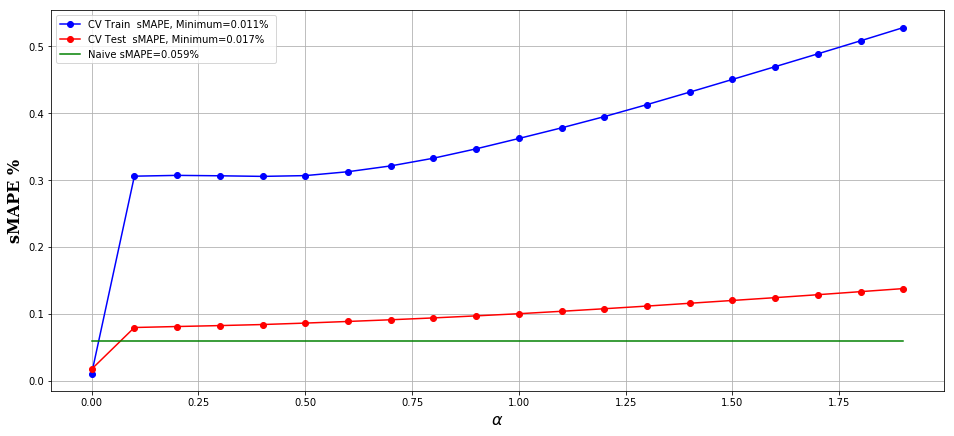

In [51]:


df=df_trend
rolling=100
alphas=np.arange(0,2,0.1)
label_x=alphas
lab=r'$\alpha$'

v_train=[]
v_test=[]
v_naive=[]
for alpha in alphas:
    df_lagged=lager(df=df,max_lag=3).dropna()
    tuplas=cv_time_series_splitter(df_lagged,rolling)
    model=Ridge(alpha=alpha)
    score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model)
    v_train.append(score_sMAPE[0])
    v_test.append(score_sMAPE[1])
    v_naive.append(score_sMAPE[2])
    
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(16,7))
ax.plot(label_x,v_train, '-o',  label="CV Train  sMAPE, Minimum="+'%.3f'%min(v_train)+"% ",color='blue')
ax.plot(label_x,v_test, '-o',  label="CV Test  sMAPE, Minimum="+'%.3f'%min(v_test)+"% ",color='red')
ax.plot(label_x,v_naive,  label="Naive sMAPE="+'%.3f'%min(v_naive)+"%",color='green')

ax.legend(loc='best')
ax.set_xlabel(lab ,fontdict=font)
ax.set_ylabel('sMAPE %',fontdict=font)
ax.grid(True)
plt.savefig(fname=ruta+"/trend_sc_1_alpha.pdf")
print('variance of test error (%sMAPE)',np.var(v_test))
print('variance of training error (%sMAPE)',np.var(v_train))



# Accompaning notes over Advanced project 1.

# Sections: Multilayer perceptron 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.layers import Dense

seed = 7
np.random.seed(seed)

In [ ]:


#model.fit(train_X,train_y,batch_size=1100,nb_epoch=8000, shuffle=False,verbose=0)
nb_epoch=nb_epoch
import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=3).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(27, init = 'normal', activation = 'tanh', input_dim = 3))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP')

In [ ]:
nb_epoch=8000
max_lag=5

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)

print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)

In [ ]:
#model.fit(train_X,train_y,batch_size=1100,nb_epoch=8000, shuffle=False,verbose=0)
max_lag=3
nb_epoch=10000

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)
print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)

In [ ]:
nb_epoch=9000
max_lag=7

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)
print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)

In [ ]:
nb_epoch=3000
max_lag=2

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.5, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)
print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)

In [ ]:
nb_epoch=10000
max_lag=10

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)
print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)

In [ ]:
nb_epoch=12000
max_lag=15

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)

print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)

In [ ]:
nb_epoch=10000
max_lag=7

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)

print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)

In [ ]:
nb_epoch=5000
max_lag=7

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)

print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)

In [ ]:
nb_epoch=2000
max_lag=1

hidden_units=int(100/(1+max_lag))

import warnings
warnings.filterwarnings("ignore")

df_lagged=lager(df=df,max_lag=max_lag).dropna()
tuplas=cv_time_series_splitter(df_lagged,rolling)
#model=Ridge(alpha=0.0)
model = Sequential()
model.add(Dense(hidden_units, init = 'normal', activation = 'tanh', input_dim = max_lag))
model.add(Dense(1, init = 'normal'))
sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

score_sMAPE=cv_time_series(tuples_train_test=tuplas,model=model,tipo='MLP',nb_epoch=nb_epoch)

print('nb_epoch=',nb_epoch,' max_lag=',max_lag , 'hidden_units',hidden_units)
print('score_sMAPE: ',score_sMAPE)